In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

## Scalling values 

In [3]:
x_train.shape
x_train=x_train/255
x_test=x_test/255

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

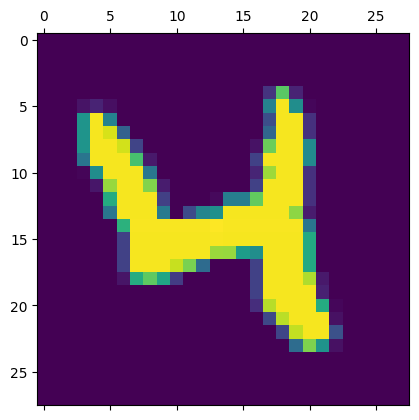

In [6]:
plt.matshow(x_train[20])

In [7]:
y_train[20]

4

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train_flattened= x_train.reshape(len(x_train),28*28)
x_test_flattened= x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

## model building

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

model.fit(x_train_flattened, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4725 - accuracy: 0.8755
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9243
Epoch 5/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9254
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2620 - accuracy: 0.9271


In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2639 - accuracy: 0.9271


[0.26385271549224854, 0.9271000027656555]

# sample prediction 

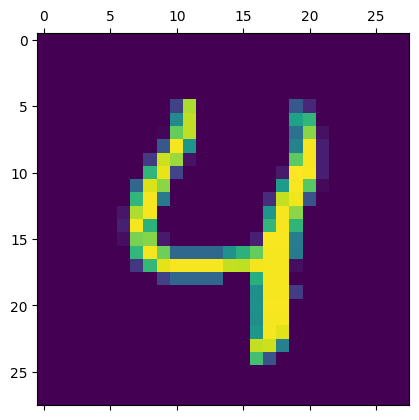

In [12]:
plt.matshow(x_test[4])

In [13]:
model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


array([[1.2946089e-02, 1.3500254e-07, 5.6655958e-02, ..., 9.9981713e-01,
        9.8611839e-02, 6.2791997e-01],
       [2.9168105e-01, 3.8931393e-03, 9.9963248e-01, ..., 2.2117925e-13,
        7.0882350e-02, 5.6113281e-10],
       [2.7454889e-04, 9.9333316e-01, 6.8678510e-01, ..., 1.3944420e-01,
        3.8813585e-01, 5.0859902e-02],
       ...,
       [2.1960027e-06, 1.9255108e-06, 1.2058463e-03, ..., 2.4782439e-01,
        4.7719112e-01, 7.5263715e-01],
       [6.5414839e-05, 6.2850952e-05, 1.2336540e-04, ..., 3.3117853e-05,
        6.0883319e-01, 6.1867628e-05],
       [5.9936335e-03, 9.8917631e-11, 2.2108738e-01, ..., 8.9226599e-09,
        9.7480879e-05, 3.8038317e-07]], dtype=float32)

In [14]:
y_predict=model.predict(x_test_flattened)
y_predict[4]

313/313 [==============================] - 1s 2ms/step


array([5.0571013e-02, 2.7410955e-05, 1.8190886e-01, 2.9645481e-03,
       9.8651636e-01, 9.0900147e-03, 1.3959436e-01, 2.1461897e-01,
       2.5728866e-01, 7.0975685e-01], dtype=float32)

In [15]:
np.argmax(y_predict[4])

4

In [16]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    9,  945,   15,    8,    2,   11,   10,   25,    3],
       [   2,    0,   21,  931,    0,   16,    2,   11,   17,   10],
       [   1,    1,    6,    1,  912,    0,   10,    5,    9,   37],
       [  10,    3,    4,   40,   11,  766,   18,    8,   26,    6],
       [  11,    3,    8,    1,    7,   11,  913,    2,    2,    0],
       [   1,    5,   25,    4,    4,    0,    0,  956,    3,   30],
       [   9,    8,    9,   27,    9,   27,   10,   13,  853,    9],
       [  11,    7,    1,   11,   23,    4,    0,   28,    4,  920]])>

Text(95.72222222222221, 0.5, 'Truth')

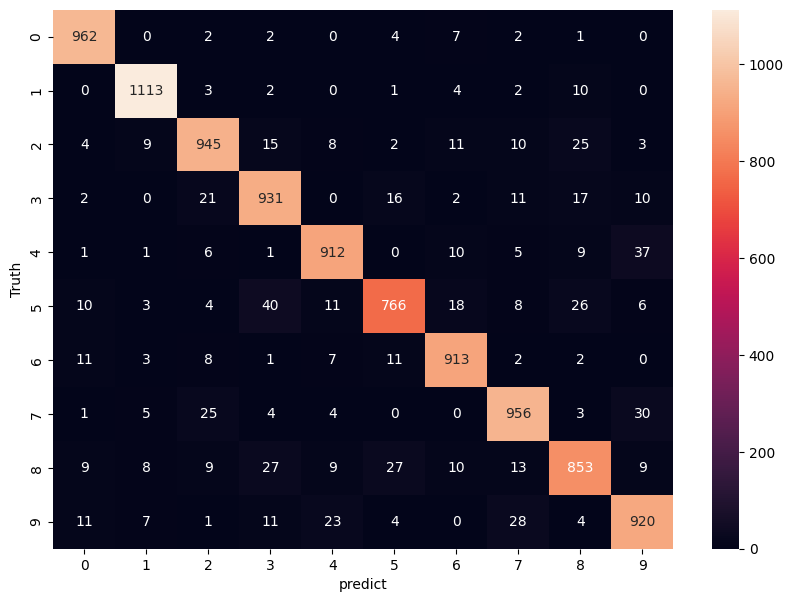

In [18]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predict')
plt.ylabel('Truth')


## adding a hidden layer

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2792 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1280 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9838


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

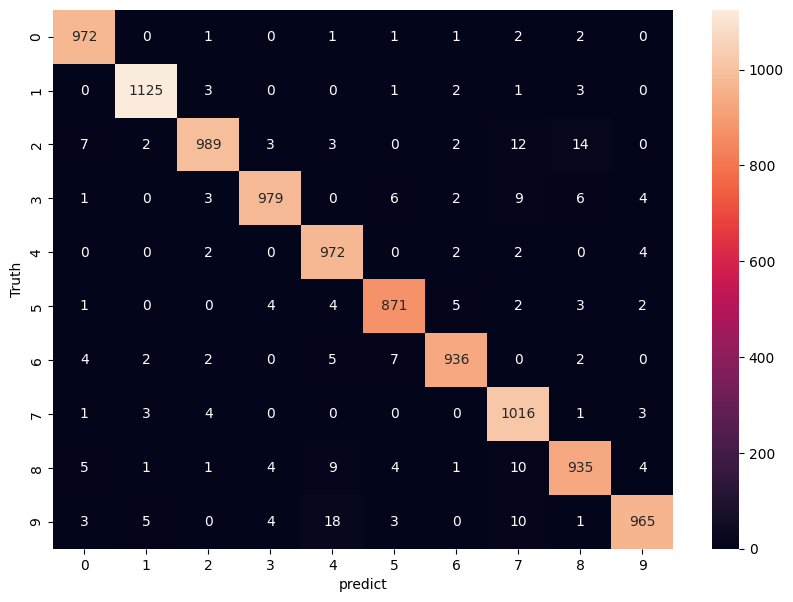

In [20]:
y_predict=model.predict(x_test_flattened)
y_predict_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predict')
plt.ylabel('Truth')


In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

tb_callback =tf.keras.callbacks.TensorBoard(log_dir='log/', histogram_freq=1)
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1222 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9832


In [22]:
%load_ext tensorboard
%tensorboard --logdir logs/fit
%reload_ext tensorboard

Reusing TensorBoard on port 6006 (pid 21288), started 5 days, 0:39:31 ago. (Use '!kill 21288' to kill it.)